In [1]:
import os.path
import os
import math as m
#import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
def gen_lattice(S0, u, d, N):
    """generates a binomial lattice
    
    for a given up, down, start value and number of steps (N).
    Resulting lattice has N+1 levels.
    """
    S = [float(S0)]

    for i in range(1, N+1):
        for j in range(0, i+1):
            S.append( S0 * d**j * u**(i-j) )

    return S


In [3]:
gen_lattice(S0=100., N=3, u=1.1, d=.9)

[100.0,
 110.00000000000001,
 90.0,
 121.00000000000001,
 99.00000000000001,
 81.0,
 133.10000000000005,
 108.90000000000002,
 89.10000000000001,
 72.9]

The number of levels in a binomial lattice of length N is $\frac{\sqrt{8N+1}-1}{2}$

In [4]:
def lattice_levels(S):
    return int( round( (m.sqrt(8*len(S)+1)-1)/2 ) )

lattice visialisation based on idea from [link](http://www.theresearchkitchen.com/archives/738)

In [5]:
tmp = os.path.join(os.path.expanduser('~'), 'tmp')
if not os.path.exists(tmp):
    os.makedirs(tmp)

In [6]:
def dotlattice(S, filename, labels=True):
    f = open(filename, 'w')
    f.write("digraph G {\n")

    shape = "plaintext" if labels else "point"

    f.write("node[shape=%s, samehead=true, sametail=true];\n" % shape)
    f.write("rankdir=LR;\n")

    f.write("edge[arrowhead=none];\n")

    # Create a dot node for each element in the lattice
    for i in range(0, len(S)):
        f.write( "node%d[label=\"%g\"];\n" % (i+1, S[i]) )

    # The number of levels in a binomial lattice
    L = lattice_levels(S)

    k=1
    for i in range(1, L):
        tabs = "\t" * (i-1)
        j = i
        while( j>0 ):
            f.write("node%d->node%d;\n" % (k, k+i))
            f.write("node%d->node%d;\n" % (k, k+i+1))
            k = k + 1
            j = j - 1

    f.write("}\n")


In [7]:
name="lattice"
dotfile=os.path.join(tmp, name+".dot")
pngfile=os.path.join(tmp, name+".png")
dotlattice(gen_lattice(S0=100., N=5, u=1.1, d=0.9), filename=dotfile )
!dot -Tpng -o {pngfile} -v {dotfile} 
#2> /dev/null

dot - graphviz version 2.30.1 (20130214.1330)
libdir = "C:\Program Files (x86)\Graphviz2.30\bin"
Activated plugin library: gvplugin_pango.dll
Using textlayout: textlayout:cairo
Using render: cairo:cairo
Using device: png:cairo:cairo
Activated plugin library: gvplugin_dot_layout.dll
Using layout: dot:dot_layout
The plugin configuration file:
	C:\Program Files (x86)\Graphviz2.30\bin\config6
		was successfully loaded.
    render	:  cairo dot fig gd gdiplus map pic pov ps svg tk vml vrml xdot
    layout	:  circo dot fdp neato nop nop1 nop2 osage patchwork sfdp twopi
    textlayout	:  textlayout
    device	:  bmp canon cmap cmapx cmapx_np dot emf emfplus eps fig gd gd2 gif gv imap imap_np ismap jpe jpeg jpg metafile pdf pic plain plain-ext png pov ps ps2 svg svgz tif tiff tk vml vmlz vrml wbmp xdot
    loadimage	:  (lib) bmp eps gd gd2 gif jpe jpeg jpg png ps svg
fontname: "Times-Roman" resolved to: (ps:pango  Times New Roman, ) (PangoCairoWin32Font) "Times New Roman, 13.9990234375" 
networ

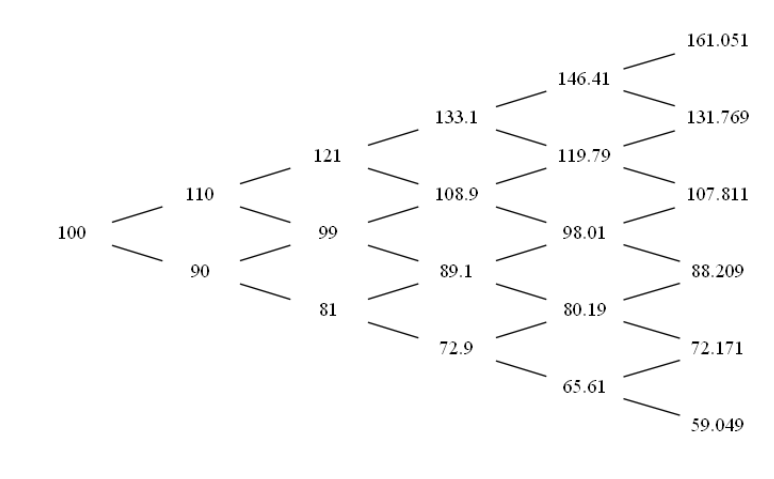

In [8]:
plt.figure(figsize=(16,8))
plt.axis('off')
plt.imshow( mpimg.imread(os.path.join(tmp, name+".png")) )

$0 < d < e^{r \Delta t} < u$

$u = e^{ \sigma \sqrt{ \Delta t } }$

$d = \frac{1}{u}$

$p = \frac{e^{r \Delta t} - d}{u - d}$ - вероятность движения вверх на каждом шаге

In [9]:
S = gen_lattice(S0=100., N=5, u=1.1, d=0.9)
######

L = lattice_levels(S)
print("levels: %d len: %d; number of first node on the last level: %d" % (L, len(S), len(S)-L))
print('------')
for i in range(len(S)-L, len(S) ):
    print(S[i])
    
print( '------\n\n')


k=len(S)-L-1 # last index before the last level starts
for i in reversed(range(1, L)):
    for j in range(0, i):
        print("%f connected to %f and %f" % (S[k], S[k+i], S[k+i+1]))
        k = k - 1
    print('---')

levels: 6 len: 21; number of first node on the last level: 15
------
161.05100000000004
131.76900000000003
107.81100000000004
88.20900000000002
72.171
59.04900000000001
------


65.610000 connected to 72.171000 and 59.049000
80.190000 connected to 88.209000 and 72.171000
98.010000 connected to 107.811000 and 88.209000
119.790000 connected to 131.769000 and 107.811000
146.410000 connected to 161.051000 and 131.769000
---
72.900000 connected to 80.190000 and 65.610000
89.100000 connected to 98.010000 and 80.190000
108.900000 connected to 119.790000 and 98.010000
133.100000 connected to 146.410000 and 119.790000
---
81.000000 connected to 89.100000 and 72.900000
99.000000 connected to 108.900000 and 89.100000
121.000000 connected to 133.100000 and 108.900000
---
90.000000 connected to 99.000000 and 81.000000
110.000000 connected to 121.000000 and 99.000000
---
100.000000 connected to 110.000000 and 90.000000
---


----------------

In [10]:
import sys
print (sys.version)
if sys.version_info >= (3,4):
    print( "with enums" )
    from enum import Enum
    class CallPut(Enum):
        call = 1
        put = 2
        
    class ExerciseStyle(Enum):
        euro = 1
        amer = 2
else:
    print( "no enums" )
    class Enum(object):
        def __init__(self, t, s):
            self.value = t
            self.str_value = s

        
        def __eq__(self,y):
            if type(y) is not self.__class__:
                return False
            return self.value == y.value

        def __str__(self):
            return self.str_value
                
    class CallPut(Enum):
        __values__ = ['call', 'put']
        
        @classmethod 
        def __enum_init__(cls):
            for i in range(len(cls.__values__)):
                setattr(cls, cls.__values__[i], CallPut(i+1, cls.__values__[i]))
    CallPut.__enum_init__()
    
    class ExerciseStyle(Enum):
        __values__ = ['euro', 'amer']
        
        @classmethod 
        def __enum_init__(cls):
            for i in range(len(cls.__values__)):
                setattr(cls, cls.__values__[i], CallPut(i+1, cls.__values__[i]))
    
    ExerciseStyle.__enum_init__()

t = CallPut.call
print( "Call: %s; Booleans: %r, %r " %(t, CallPut.call == t, CallPut.put == t) )
print( "Wrong type: %r" % (t == 1) )

3.4.3 (v3.4.3:9b73f1c3e601, Feb 24 2015, 22:44:40) [MSC v.1600 64 bit (AMD64)]
with enums
Call: CallPut.call; Booleans: True, False 
Wrong type: False


In [0]:
def pv_crr(amerEuro, callPut, S0, K, T, r, sigma, N):
    dt = T / N
    df = m.exp(-r * dt)

    u = m.exp(sigma * m.sqrt(dt))
    d = 1 / u
    p = ( m.exp(r * dt) - d ) / (u - d)

    S = gen_lattice(S0=S0, N=N, u=u, d=d)
    L = N+1 #lattice_levels(S)
    
    payoff = lambda x: max( 0, x - K ) if CallPut.call == callPut else max( 0, K - x)

    # Calculate payoff at the last lattice level
    ## TODO ##

    # Go backwards, calculate extected value for prev node, based on known nodes
    # Calculate payoff at node k, based on expected value of S
    ## TODO ##
    
    return S[0], S

# parameters
S0 = 100.
T = 1.
r = 0.05
sigma = 0.20
K = 100.
N = 1000

es = ExerciseStyle.euro
pvC, _ = pv_crr(es, CallPut.call, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvC )
pvP, _ = pv_crr(es, CallPut.put, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvP )

es = ExerciseStyle.amer
pvC, _ = pv_crr(es, CallPut.call, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvC )
pvP, _ = pv_crr(es, CallPut.put, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvP )

-------